In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
print('train data =', len(x_train_image))
print(' test data =', len(x_test_image))

train data = 60000
 test data = 10000


In [5]:
print('X_train_image :', x_train_image.shape)
print('y_train_label :', y_train_label.shape)

X_train_image : (60000, 28, 28)
y_train_label : (60000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap = 'binary')
    plt.show()

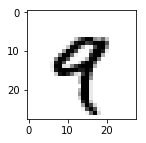

In [20]:
plot_image(x_train_image[4])

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, 
                                 prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num): 
        ax = plt.subplot(5, 5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap = 'binary') #畫出subgraph子圖形
        title = "label =" + str(labels[idx]) #設定子圖形title，顯示標籤欄位
        if len(prediction) > 0: #如果有傳入預測結果
            title += ", predict =" + str(prediction[idx]) #標題title加入預測結果
        ax.set_title(title, fontsize = 10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx += 1 #讀取下一筆
    plt.show()

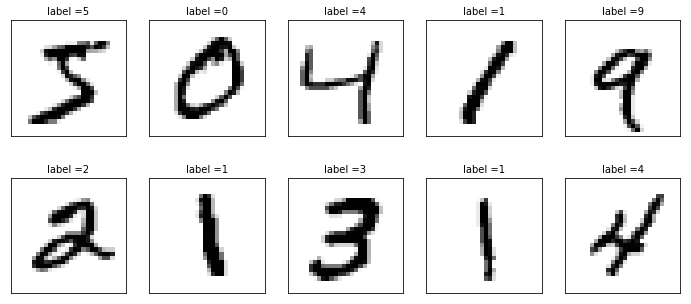

In [9]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [10]:
print('X_train_image :', x_test_image.shape)
print('y_train_label :', y_test_label.shape)

X_train_image : (10000, 28, 28)
y_train_label : (10000,)


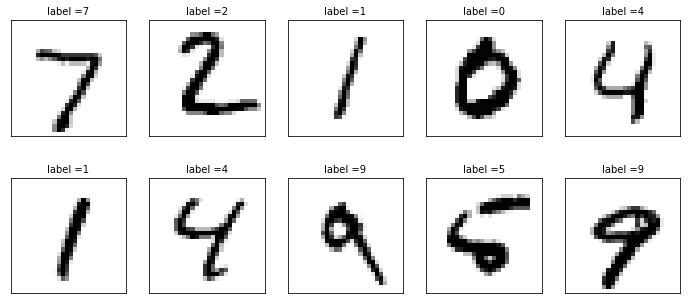

In [11]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

In [12]:
print('X_train_image :', x_train_image.shape)
print('y_train_label :', y_train_label.shape)

X_train_image : (60000, 28, 28)
y_train_label : (60000,)


In [13]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test  = x_test_image.reshape(10000, 784).astype('float32')

In [14]:
print('x_train: ', x_Train.shape)
print('x_test: ', x_Test.shape)

x_train:  (60000, 784)
x_test:  (10000, 784)


In [15]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [16]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
# similar to as.factor in R

In [18]:
y_TrainOneHot[:5]
#      0    1    2    3    4    5    6    7    8    9
# 5: [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]
# 0: [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]
# 4: [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]
# 1: [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
# 9: [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])